In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load LDA model
with open('models/lda_model_150.pkl', 'rb') as f:
    lda_model = pickle.load(f)

In [3]:
# load dataframe containing topics
df = pd.read_pickle('C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/data_topics.pkl')

In [4]:
# add year column
df['year'] = df['date'].dt.year

In [5]:
df.head()

,text,date,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593,{68: 0.3588338},2021
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796,{68: 0.46662897},2021
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301,{68: 0.2632997},2021
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555,{},2021
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996,{68: 0.3100206},2021


In [6]:
topics_of_interest = {
    14: 'Jugend und Förderung',
    115: 'Gleichberechtigung',
    37: 'Militär',
    126: 'Rente und Sozialpolitik',
    129: 'Russland-Ukraine-Konflikt',
    118: 'Entwicklungspolitik ',
    135: 'Energie und Klima',
    148: 'Kinder und Familienpolitik',
    2: 'Strafe und Verbrechen',
    25: 'Gesundheitswesen ',
    26: 'Umweltschutz ',
    46: 'Bildungspolitik ',
    5: 'Familienrecht ',
    32: 'Kultur',
    131: 'Schwangerschaftsabbruch ',
    106: 'Corona',
    0: 'Gesundheitsrisiken'
}

# Historical Development of Speeches in Topic

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()

    plt.figure(figsize=(15, 8))
    plt.bar(speeches_per_year.index, speeches_per_year.values, color='darkseagreen')
    plt.title(f'Chronological Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Number of Speeches')
    plt.xticks(rotation=45)
     
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_yearly/{topic_title}.png') #pad_inches=0

# Topic by Speaker Gender

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_gender = filtered_df.groupby('speaker_gender').size()
    sum_speeches = speeches_per_gender.sum()

    plt.figure(figsize=(10, 6))
    bar = plt.bar(speeches_per_gender.index, speeches_per_gender.values/sum_speeches*100, color=['orange', 'lightblue'], alpha=0.6)
    plt.title(f'Gender Topic Distribution for "{topic_title}"')
    plt.xlabel('Speaker Gender')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.ylim(top=100)
    plt.bar_label(bar, label_type='edge', fmt='{:0.0f}%')

    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender/{topic_title}.png') #pad_inches=0

# Historical Development of Speeches by Gender

In [10]:
# function for setting custom bar labels
def set_bar_labels(plot):
    # check current plot
    fem_plot = plot.get_label() == 'female speakers'

    for bar in plot:
        height = bar.get_height()
        y_pos = height - 1.5 if fem_plot else 100.5 - height
        text_padding = 0.1 if round(height) == 100 else 0.2

        if round(height) != 0:
            plt.text(bar.get_x() + text_padding, 
                    y_pos, 
                    s=f'{round(height)}',
                    fontsize='xx-small' if round(height) == 100 else 'x-small',
                    color='chocolate' if fem_plot else 'steelblue'
                    )

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()
    grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

    years = []
    female_speech_count = []
    male_speech_count = []

    for year, gender in grouped_df.items():
        years.append(year)
        female_speech_count.append(gender.iloc[0] if gender.iloc[0] > 0 else 0)
        male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

    relative_female_speeches = female_speech_count / speeches_per_year * 100
    relative_male_speeches = male_speech_count / speeches_per_year * 100

    plt.figure(figsize=(20, 10))
    bar_fem = plt.bar(years,
                      relative_female_speeches, 
                      color='orange', 
                      width=1, 
                      edgecolor='grey', 
                      label='female speakers',
                      alpha=0.6
                      )
    bar_male = plt.bar(years,
                       relative_male_speeches,
                       bottom=relative_female_speeches, 
                       color='lightblue', 
                       width=1, 
                       edgecolor='grey', 
                       label='male speakers',
                       alpha=0.6
                       )
    
    plt.title(f'Chronological Development of Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.margins(x=0, y=0)
    plt.legend(loc='upper right')

    # set custom bar labels
    for plot in [bar_fem, bar_male]:
        set_bar_labels(plot)
        
    #plt.show()
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_yearly/{topic_title}.png') #pad_inches=0

In [17]:
relative_female_speeches

year
1949     0.000000
1950     0.000000
1951     0.000000
1952     5.555556
1953    10.526316
          ...    
2019    49.000000
2020    41.456583
2021    34.300792
2022    46.428571
2023    50.000000
Length: 75, dtype: float64

In [219]:
# test if relative values add up to 100
print(relative_female_speeches.values + relative_male_speeches.values)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100.]


## Test if missing years are correct

In [158]:
filtered_df = df[df['topic_distribution'].apply(lambda topics: 14 in topics)]
grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

speeches_per_year = filtered_df.groupby('year').size()

In [163]:
filtered_df[filtered_df['year'] == 1959]

,text,date,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year


In [148]:
for year, gender in grouped_df.items():
    print(year, gender)

1950 speaker_gender
female    NaN
male      4.0
Name: 1950, dtype: float64
1951 speaker_gender
female    NaN
male      1.0
Name: 1951, dtype: float64
1952 speaker_gender
female    1.0
male      NaN
Name: 1952, dtype: float64
1953 speaker_gender
female    1.0
male      2.0
Name: 1953, dtype: float64
1954 speaker_gender
female    NaN
male      1.0
Name: 1954, dtype: float64
1955 speaker_gender
female    NaN
male      1.0
Name: 1955, dtype: float64
1956 speaker_gender
female    NaN
male      4.0
Name: 1956, dtype: float64
1957 speaker_gender
female    NaN
male      2.0
Name: 1957, dtype: float64
1958 speaker_gender
female    NaN
male      1.0
Name: 1958, dtype: float64
1960 speaker_gender
female    1.0
male      9.0
Name: 1960, dtype: float64
1961 speaker_gender
female    1.0
male      5.0
Name: 1961, dtype: float64
1962 speaker_gender
female    1.0
male      7.0
Name: 1962, dtype: float64
1963 speaker_gender
female    NaN
male      7.0
Name: 1963, dtype: float64
1964 speaker_gender
femal

## Reference Graphic - Speeches per Year

In [8]:
total_speeches_per_year = df.groupby('year').size()

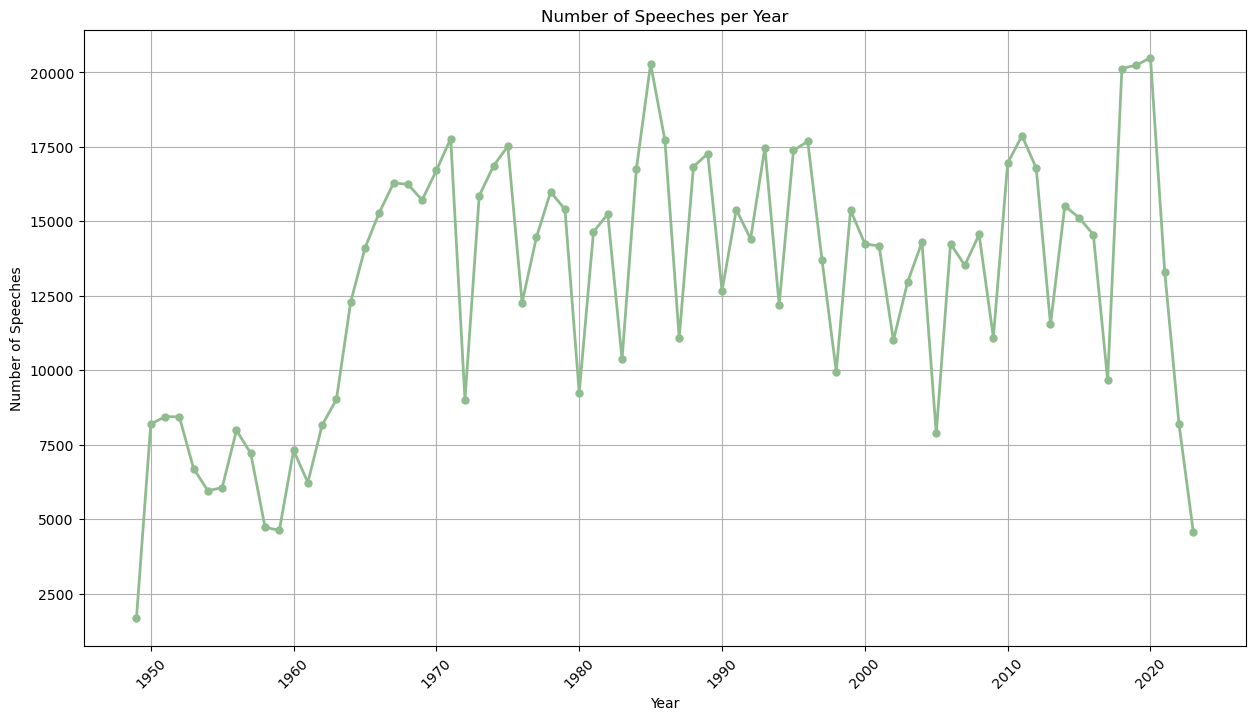

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(total_speeches_per_year.index, 
         total_speeches_per_year.values, 
         marker='.',
         markersize=10.0,
         linestyle='-',
         linewidth=2.0,
         color='darkseagreen')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Topic Frequency by Average Female/Male Speaker

In [44]:
topic_df = pd.DataFrame()

for topic in topics_of_interest:
    topic_df = pd.concat([topic_df, df[df['topic_distribution'].apply(lambda topics: topic in topics)]], ignore_index=True)

In [46]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120134 entries, 0 to 120133
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   text                120134 non-null  object        
 1   date                120134 non-null  datetime64[ns]
 2   speaker_name        120134 non-null  object        
 3   speaker_gender      120134 non-null  object        
 4   speaker_role        104536 non-null  object        
 5   speaker_party       119561 non-null  object        
 6   comments            120134 non-null  object        
 7   id                  120134 non-null  object        
 8   speaker_id          120134 non-null  int64         
 9   speech_length       120134 non-null  int64         
 10  topic_distribution  120134 non-null  object        
 11  year                120134 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 11.0+ MB


In [52]:
grouped_df = topic_df.groupby(['year', 'speaker_gender'])
yearly_female_speeches = []
yearly_male_speeches = []

for year, gender in grouped_df.size().unstack(level=0).items():
    male_speech_count = len(grouped_df.get_group((year, 'male')))
    female_speech_count = len(grouped_df.get_group((year, 'female')))

    yearly_male_speeches.append(male_speech_count)
    yearly_female_speeches.append(female_speech_count)

In [53]:
yearly_female_speeches

[5,
 18,
 14,
 30,
 20,
 35,
 23,
 25,
 64,
 28,
 15,
 31,
 21,
 41,
 53,
 52,
 64,
 94,
 91,
 102,
 99,
 163,
 149,
 80,
 148,
 246,
 215,
 112,
 185,
 272,
 279,
 110,
 242,
 210,
 235,
 334,
 419,
 416,
 257,
 533,
 830,
 529,
 662,
 536,
 596,
 523,
 632,
 730,
 623,
 483,
 1039,
 861,
 802,
 692,
 702,
 722,
 390,
 963,
 921,
 1043,
 635,
 1130,
 1235,
 1074,
 715,
 1222,
 1123,
 1073,
 798,
 919,
 1087,
 1289,
 808,
 917,
 483]

In [25]:
import numpy as np
np.arange(1949, 2024, 1)

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

[0.0, 0.0, 7.142857142857142, 3.3333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 3.571428571428571, 6.666666666666667, 3.225806451612903, 0.0, 2.4390243902439024, 1.8867924528301887, 5.769230769230769, 10.9375, 9.574468085106384, 1.098901098901099, 2.941176470588235, 3.0303030303030303, 0.6134969325153374, 1.342281879194631, 8.75, 2.7027027027027026, 0.0, 2.7906976744186047, 6.25, 1.6216216216216217, 1.4705882352941175, 3.942652329749104, 7.2727272727272725, 4.545454545454546, 3.8095238095238098, 7.659574468085106, 5.9880239520958085, 1.1933174224343674, 4.567307692307692, 7.782101167315175, 2.6266416510318953, 5.0602409638554215, 4.3478260869565215, 4.380664652567976, 4.291044776119403, 3.0201342281879198, 6.692160611854685, 3.9556962025316458, 2.191780821917808, 8.346709470304976, 7.867494824016563, 5.2935514918190565, 6.3879210220673635, 5.7356608478802995, 7.369942196531793, 5.555555555555555, 11.357340720221606, 32.56410256410256, 9.034267912772584, 4.125950054288817, 10.354745925215724

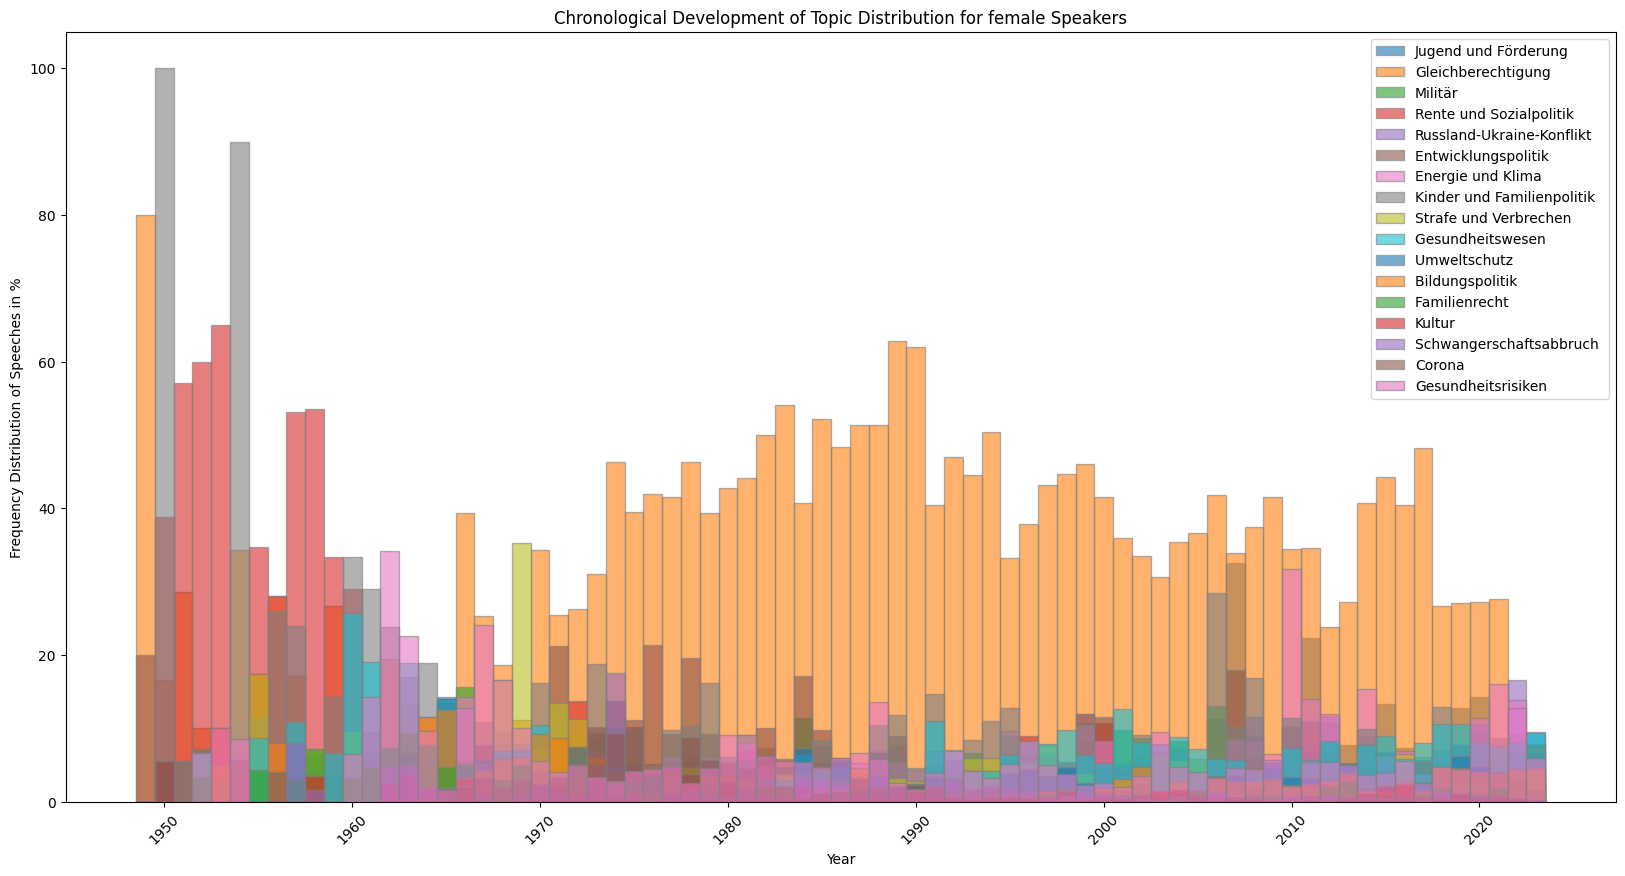

In [54]:
#previous_frequencies = 0

def make_dist_plot(gender):
    for topic in topics_of_interest:
        topic_title = topics_of_interest[topic]

        filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
        grouped_topic_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

        years = []
        speech_count = []
        #male_speech_count = []

        gender_index = 0 if gender == 'female' else 1
        yearly_speeches = yearly_female_speeches if gender == 'female' else yearly_male_speeches

        for year, genders in grouped_topic_df.items():
            years.append(year)
            speech_count.append(genders.iloc[gender_index] if genders.iloc[gender_index] > 0 else 0)
            #male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

        speech_frequency = [int(count) / int(total_count) * 100 for count, total_count in zip(speech_count, yearly_speeches)]
        #male_speech_frequency = [int(count) / int(total_count) * 100 for count, total_count in zip(male_speech_count, yearly_male_speeches)]

        #previous_frequencies = fem_speech_frequency
        print(speech_frequency)

        plt.bar(years,
                speech_frequency, 
                #bottom=previous_frequencies,
                #color='orange', 
                width=1, 
                edgecolor='grey', 
                label=topic_title,
                alpha=0.6
                )
    # bar_male = plt.bar(years,
    #                    relative_male_speeches,
    #                    bottom=relative_female_speeches, 
    #                    color='lightblue', 
    #                    width=1, 
    #                    edgecolor='grey', 
    #                    label='male speakers',
    #                    alpha=0.6
    #                    )

for gender in ['female']:
    plt.figure(figsize=(20, 10))
    make_dist_plot(gender)

    plt.title(f'Chronological Development of Topic Distribution for {gender} Speakers')
    plt.xlabel('Year')
    plt.ylabel('Frequency Distribution of Speeches in %')
    plt.xticks(rotation=45)
    #plt.margins(x=0, y=0)
    plt.legend(loc='upper right')
        
    plt.show()
    #plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_yearly/{topic_title}.png') #pad_inches=0

In [10]:
grouped_df = df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
speaker_gender,,,,,,,,,,,,,,,,,,,,,
female,41,162,169,261,173,207,166,299,364,173,...,7264,7212,7185,4809,6048,6744,6829,5288,2819,1590
male,1654,8035,8276,8179,6526,5750,5899,7685,6849,4564,...,8251,7913,7369,4859,14083,13498,13664,8007,5367,2983


In [37]:
for year, gender in grouped_topic_df.items():
    print(gender[1])

2.0
9.0
26.0
34.0
17.0
11.0
7.0
11.0
6.0
5.0
3.0
22.0
22.0
29.0
33.0
61.0
72.0
88.0
91.0
79.0
64.0
79.0
92.0
47.0
86.0
92.0
72.0
50.0
87.0
76.0
69.0
64.0
92.0
71.0
51.0
79.0
106.0
120.0
66.0
87.0
47.0
33.0
41.0
43.0
80.0
40.0
51.0
68.0
49.0
29.0
21.0
33.0
26.0
36.0
59.0
26.0
14.0
35.0
52.0
44.0
44.0
38.0
77.0
74.0
36.0
57.0
56.0
52.0
33.0
74.0
51.0
209.0
249.0
135.0
29.0


In [3]:
grouped_df.get_group((1949, 'female')).head()

NameError: name 'grouped_df' is not defined